In [1]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
input_csv = '../../data/mock/agency_performance_dashboard_level2.csv'
df = pd.read_csv(input_csv)
df.head()

,Financial Year,Category,Data Type,Value
0,2014/15,Accounts Payable,Agency Unit Cost,70
1,2014/15,Accounts Payable,Agency Volume,14250
2,2014/15,Accounts Payable,WoG Average Unit Cost,28
3,2014/15,Accounts Receivable,Agency Unit Cost,70
4,2014/15,Accounts Receivable,Agency Volume,14250


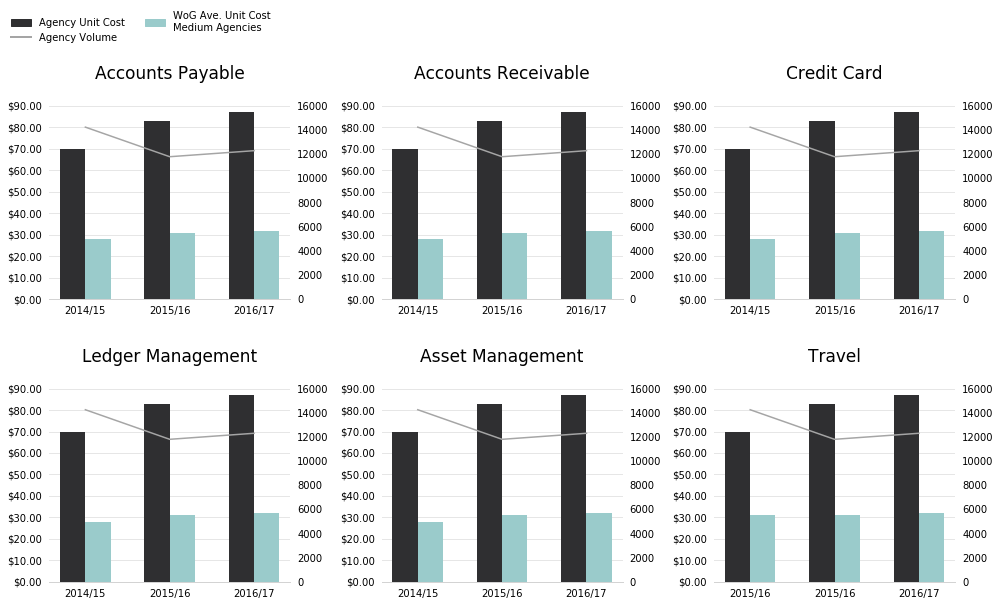

In [5]:
# Initialize figure and axes
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

def create_graph(title, sdf, ax):
    # Draw the bars
    d1 = sdf[sdf['Data Type'] == 'Agency Unit Cost']
    ax.bar([x - 0.15 for x in range(len(d1))], d1['Value'].values, width=0.3, color='#2F2F31', zorder=2)
    d2 = sdf[sdf['Data Type'] == 'WoG Average Unit Cost']
    ax.bar([x + 0.15 for x in range(len(d2))], d2['Value'].values, width=0.3, color='#9ACBCB', zorder=2)
    ax.set_xticks(range(len(d2)))
    ax.set_xticklabels(d2['Financial Year'].values)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.2f}'.format(x)))
    ax.yaxis.grid(color='#e6e6e6', linewidth=1)
    ax.set_title('\n' + title + '\n', fontsize=17)
    ax.set_yticks(range(0, 91, 10))
    ax.set_ylim(0,90)
    # Draw the line plot
    d3 = sdf[sdf['Data Type'] == 'Agency Volume']
    axt = ax.twinx()
    axt.plot(d3['Value'].values, color='#a5a5a5', zorder=2)
    axt.set_ylim(0,16000)
    for x in [ax, axt]:
        x.spines['top'].set_visible(False)
        x.spines['right'].set_visible(False)
        x.spines['left'].set_visible(False)
        x.spines['bottom'].set_edgecolor('lightgray')
        x.spines['bottom'].set_linewidth(1)
        x.tick_params(top='off', bottom='off', left='off', right='off')

categories = list(df['Category'].unique())
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    category = categories[i]
    sdf = df[df['Category'] == category]
    create_graph(category, sdf, ax)

from matplotlib.lines import Line2D

# Draw the legend
handles = [
    mpatches.Patch(color='#2F2F31', label='Agency Unit Cost'),
    Line2D([], [], color='#a5a5a5', linewidth=2, label='Agency Volume'),
    mpatches.Patch(color='#9ACBCB', label='WoG Ave. Unit Cost\nMedium Agencies')
]
legend = ax.legend(handles=handles, ncol=2)
legend.set_bbox_to_anchor((-1.8,3))
frame = legend.get_frame()
frame.set_linewidth(0)

fig.tight_layout()

# Write to a file
fig.savefig('../../reports/figures/mock/agency_performance_dashboard_level2.pdf', bbox_inches='tight')